# Exercise 1
#### Sasi Tummala

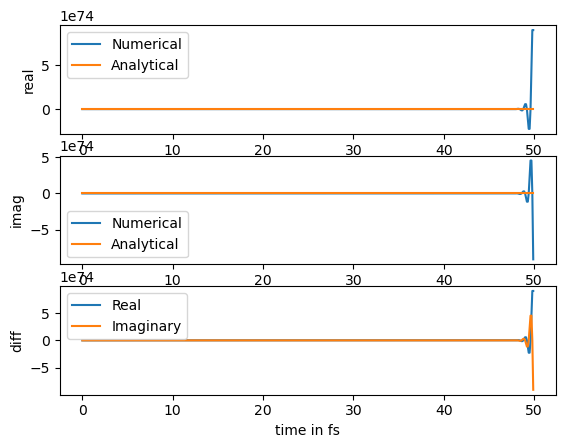

In [19]:
import numpy as np
import matplotlib.pyplot as plt

psi_0  = complex(0,1) ##initial condition
Dt = 0.1 ##grid size
E_0 = 10 ##eigenenergy
N = 500 ##number of time steps

def psi_n(n, psi_0):
  if n == 0:
    return psi_0
  else:
    return psi_n(n-1, psi_0)*(complex(1,-E_0*Dt))

def psi_a(n, psi_0):
    return psi_0*np.exp(complex(0, -E_0*n*Dt))

def euler_approx(Dt, N):
  T, Psi_NR, Psi_AR, Psi_NI, Psi_AI = [], [], [], [], []
  for i in range(N):
    T.append(i*Dt)
    Psi_NR.append(psi_n(i, psi_0).real)
    Psi_AR.append(psi_a(i, psi_0).real)
    Psi_NI.append(psi_n(i, psi_0).imag)
    Psi_AI.append(psi_a(i, psi_0).imag)
  return T, Psi_NR, Psi_AR, Psi_NI, Psi_AI

T, Psi_NR, Psi_AR, Psi_NI, Psi_AI = euler_approx(Dt, N)

#real
plt.subplot(3, 1, 1)
plt.plot(T, Psi_NR, label = 'Numerical')
plt.plot(T, Psi_AR, label = 'Analytical')
plt.ylabel('real')
plt.legend()

#imag
plt.subplot(3, 1, 2)
plt.plot(T, Psi_NI, label = 'Numerical')
plt.plot(T, Psi_AI, label = 'Analytical')
plt.ylabel('imag')
plt.legend()

#diff
plt.subplot(3, 1, 3)
plt.plot(T, np.subtract(Psi_NR, Psi_AR), label = 'Real')
plt.plot(T, np.subtract(Psi_NI, Psi_AI), label = 'Imaginary')
plt.legend()
plt.ylabel('diff')

plt.xlabel('time in fs')
plt.show()